<h1 style="color:Indigo">Vaccine Predication</h1>

<h3 style="color:Indigo">Business Case:</h3>

   To predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. 
  
<h3 style="color:Indigo">Problem Statement:</h3>

   The objective of this project is to develop a predictive model for studying the future trends of vaccine for
any particular diseases. By using machine learning techniques, we aim to accurately predict vaccine uptake based on various individual-level factors. 

<h3 style="color:Indigo">Background:</h3>

   In 2009, a new strain of influenza virus called H1N1 emerged and caused a global pandemic. The H1N1 influenza virus, commonly known as swine flu, spread rapidly across different countries and continents, raising concerns about its impact on public health. This strain was a unique combination of influenza viruses that had not been previously identified in humans.

   It's important to note that the H1N1 vaccine specifically targets the H1N1 strain, while the seasonal flu vaccine protects against various strains of influenza. Both vaccines play a crucial role in preventing flu infections and minimizing their impact on individuals and communities.

   By developing a predictive model for vaccine uptake, we aim to provide valuable insights into individual vaccination behavior and contribute to proactive public health strategies. The model will utilize a combination of demographic, socioeconomic, and health-related factors to predict the likelihood of individuals receiving their H1N1 and seasonal flu vaccines. The outcome of this project will aid in optimizing vaccine distribution, promoting vaccine awareness, and ultimately reducing the burden of flu-related illnesses and hospitalizations."



<h1 style="color:Indigo"> Reading the data</h1>

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# setting maximum number of columns to be displayed
pd.set_option('display.max_columns',None)

In [3]:
# loading training features into a dataframe
train_features_df = pd.read_csv("features.csv",index_col = "respondent_id")
train_features_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [4]:
# loading training labels into a dataframe 
train_label_df = pd.read_csv("labels.csv",index_col = "respondent_id")
train_label_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [5]:
#To combine the training labels and training features into a single dataframe
data=pd.concat([train_label_df,train_features_df],axis=1)

In [6]:
data

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


<h1 style="color:Indigo"> Basic Checks</h1>

In [7]:
# previewing the first five rows
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
# previewing the last five rows
data.tail()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [9]:
# previewing number of rows and columns
data.shape

(26707, 37)

In [10]:
#To check  data type and  null value of all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

In [11]:
# previewing summary statistics of columns
data.describe()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [12]:
#checking info about categorical data/columns
data.describe(include="O")


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [13]:
# checking for missing values
missing = data.isna().sum().to_frame()
missing

,0
h1n1_vaccine,0
seasonal_vaccine,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82


<h1 style="color:Indigo">  Data Description</h1>

data contains information on the social,economic and demographic backgrounds of the respondents as well as their opinions on the H1N1 and seasonal flu vaccines. The datasets have been divided into the training set features and the training set labels. The Total training data has 26707 rows and 36 columns. The information contained with the columns is as follows as described by the data 

|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getting sick with seasonal flu without vaccine with 1 being very low and 5 being very high|
|22|`opinion_seas_sick_from_vacc`| Respondent's worry of getting sick from taking seasonal flu vaccine with 1 being not worried at all and 5 being very worried|
|23|`age_group`| Age group of respondents|
|24|`education`| Self-reported educational level|
|25|`race`| Race of respondent|
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 

* after doing domain analysis we can see that employment_occupation, employment_industry, hhs_geo_region this columns contain same random string that didn't give any important info related to vaccine prediction so that's why we can drop that columns.

In [14]:
#removing unwanted columns
data.drop(["hhs_geo_region","employment_industry","employment_occupation"],axis=1,inplace=True)

<h1 style="color:Indigo"> Data insights</h1>

* Most columns with float datatype are categorical in nature with values ranging from 0-5.
* Almost all columns have missing values
* The columns, hhs_geo_region, employment_industry and employment_occupation are encoded with random strings so we drop that columns.



<h1 style="color:Indigo"> Exploratory Data Analysis</h1>

<h3 style="color:Indigo">Bivariate </h3>

This section mainly explores the distribution of some features

In [15]:
data.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'census_msa', 'household_adults',
       'household_children'],
      dtype='object')

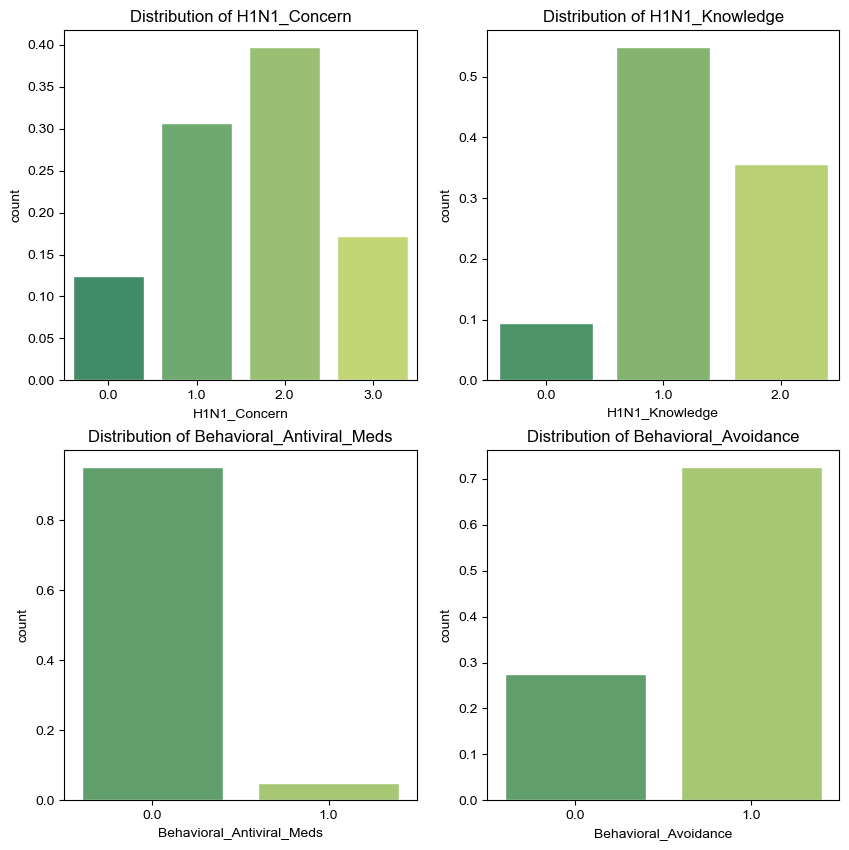

In [16]:
# adding columns to plot to a list
columns = ['h1n1_concern', 'h1n1_knowledge','behavioral_antiviral_meds', 'behavioral_avoidance']

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (10,10),nrows = 2,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
    #palette="summer" parameter sets the color palette for the bars.

    ax.set_xlabel(f"{col.title()}",fontsize=10) # setting the respective labels
    ax.set_ylabel("count",fontsize=10)
    ax.set_title(f"Distribution of {col.title()}");

<h3 style="color:Indigo">Data Insights</h3>

* most of the people are concern about hini_vaccine
* approximately more than 90% people are having knowlegde of hini_flue
* people are depend on vaccine only,very less people take antiviral medicine.
* more than 70% people avoid contact with other how has flue like symptoms.


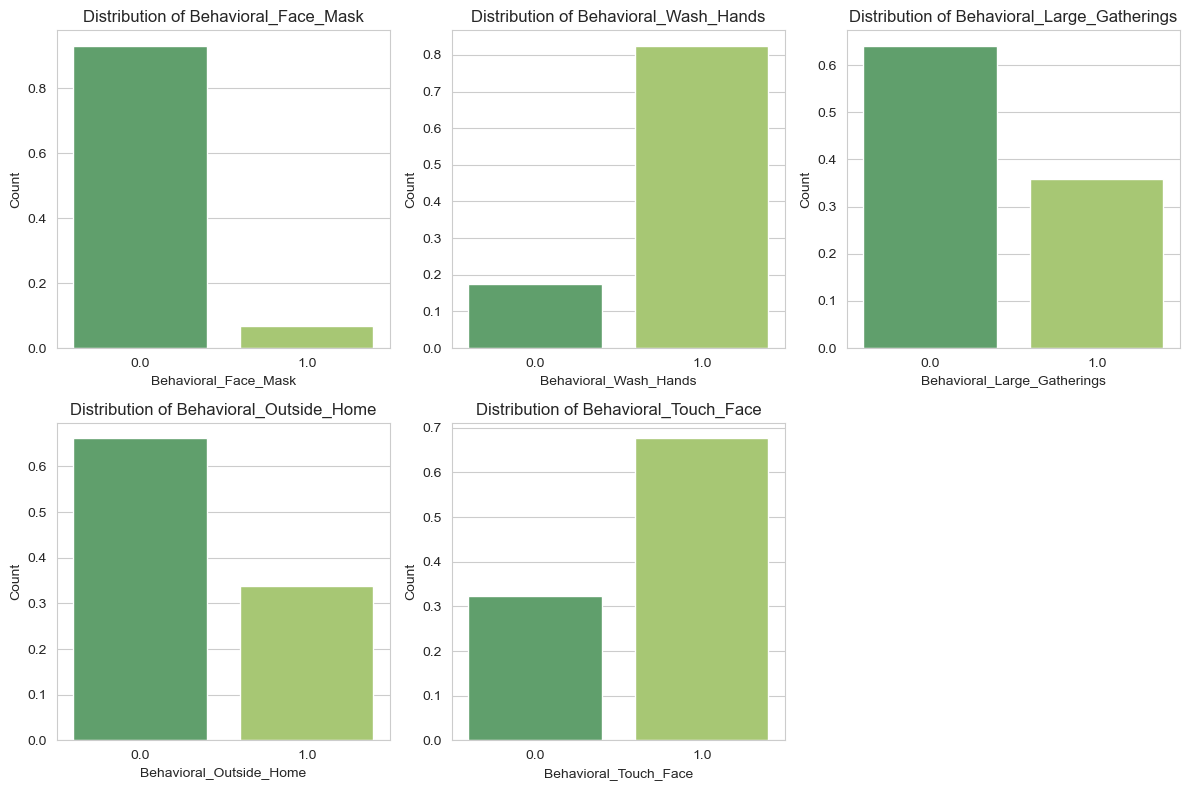

In [17]:
columns = ['behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home',
           'behavioral_touch_face']

fig, axes = plt.subplots(figsize=(12,8), nrows=2, ncols=3)
sns.set_style("whitegrid")

# Flatten the axes array to loop over the axes directly
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]

    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x, y=y, palette="summer", ax=ax)

    ax.set_xlabel(f"{col.title()}", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_title(f"Distribution of {col.title()}");

# Remove any extra subplots if the number of features is less than the available subplots
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<h3 style="color:Indigo">Data Insights</h3>

* 95% people not buying face mask.
* 80% people wash hand frequently or used sanitizer.
* 35%people has reduced time at large gathering.
* 67%of people still Has contact with people outside of own household.
* 68% people Has avoided touching eyes, nose or mouth.

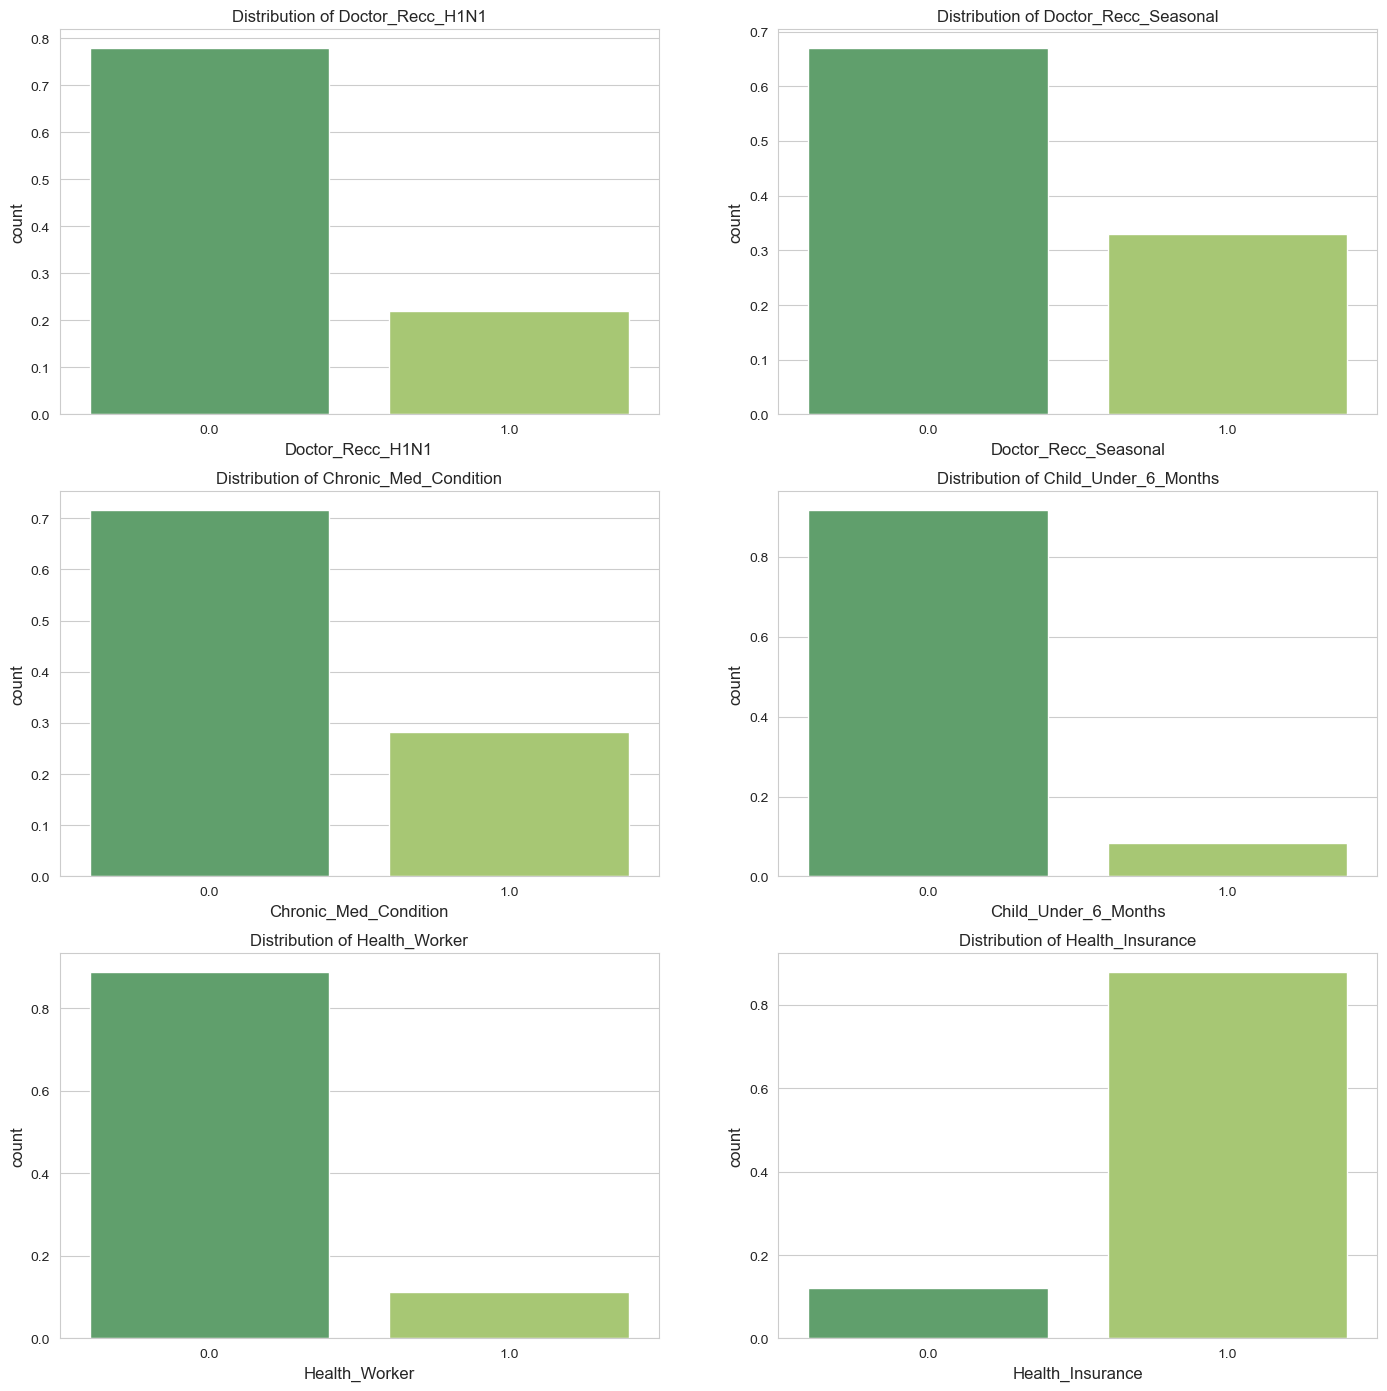

In [18]:
columns =  ['doctor_recc_h1n1', 'doctor_recc_seasonal','chronic_med_condition','child_under_6_months', 'health_worker',
            'health_insurance']

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (17,17),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
    #palette="summer" parameter sets the color palette for the bars.

    ax.set_xlabel(f"{col.title()}",fontsize=12) # setting the respective labels
    ax.set_ylabel("count",fontsize=12)
    ax.set_title(f"Distribution of {col.title()}");

<h3 style="color:Indigo">Data Insights</h3>

* 78% of people are not recommended to take H1N1 flu vaccine by doctor
* 67% of prople are not recommmended to take seasonal flu vaccine by doctor.
* 72% of prople not have any chronic medical condition.
* 90% of people has regular close contact with a child under the age of six month.
* 10% people are helpcare worker.
* 90% people has  health insurance.

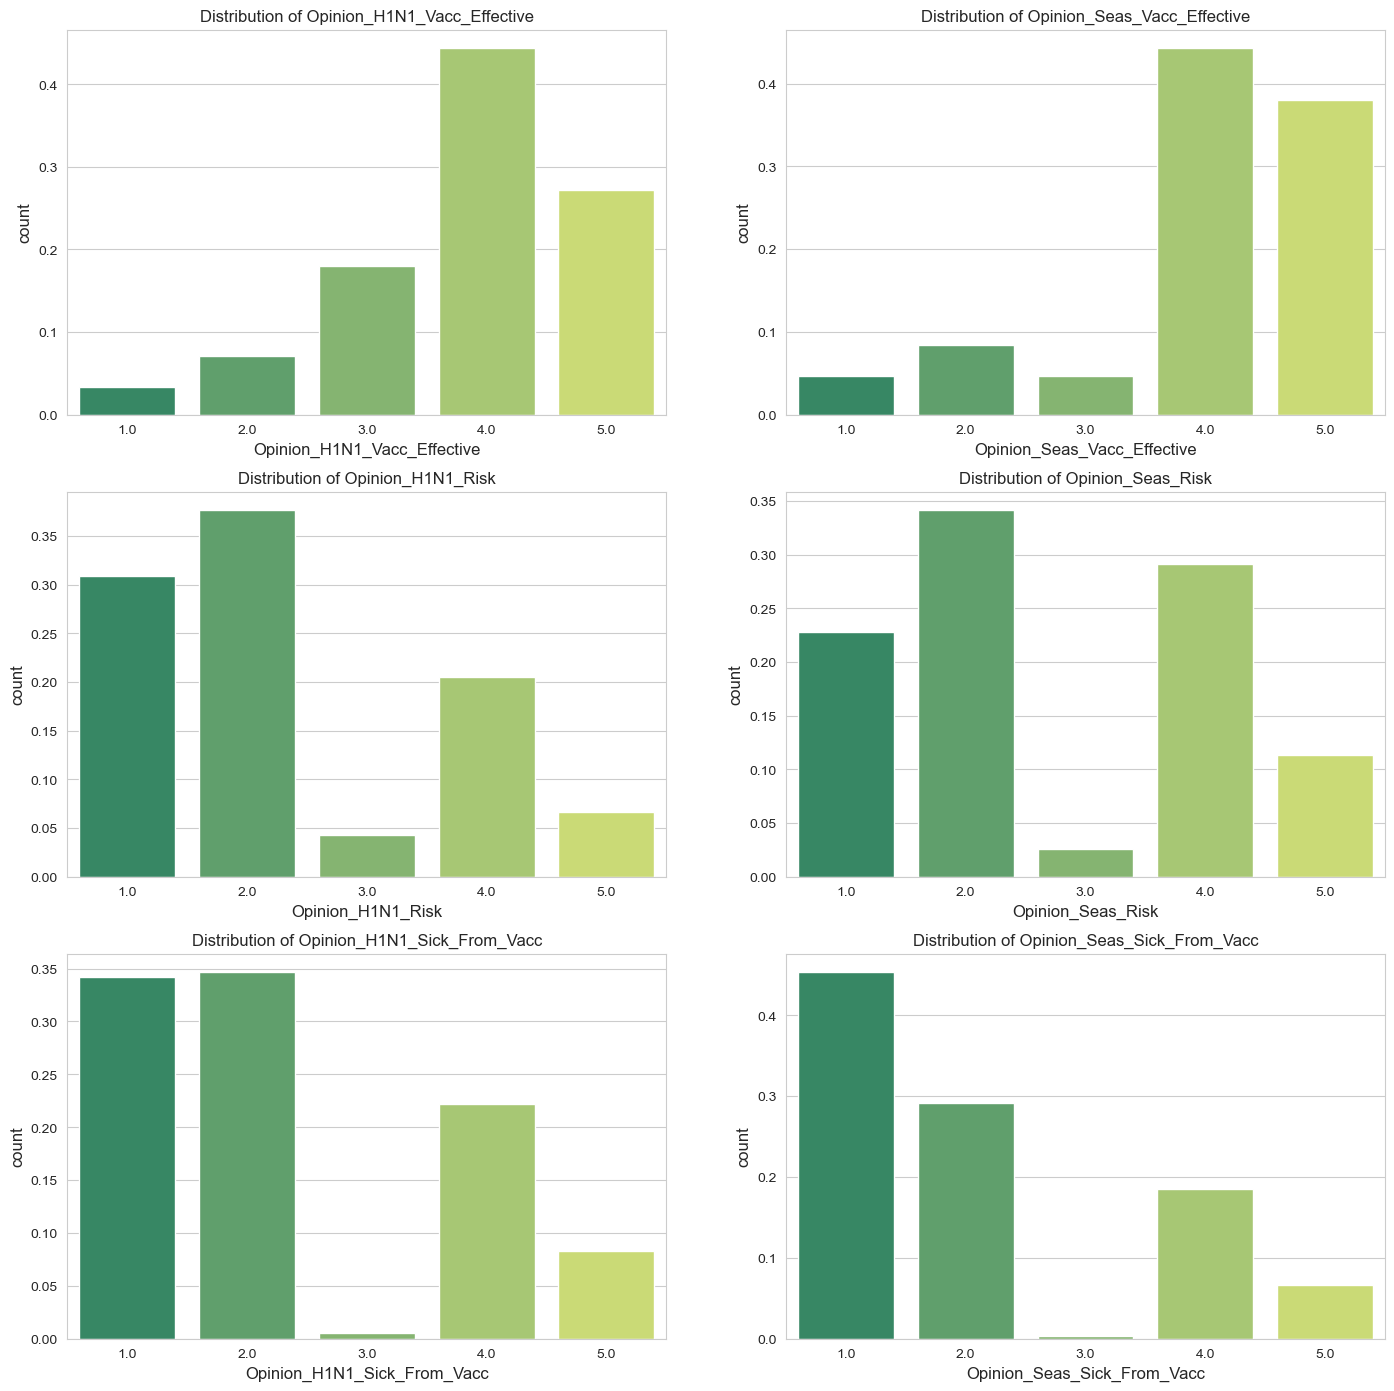

In [19]:
columns=['opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective','opinion_h1n1_risk',
       'opinion_seas_risk', 'opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc']
        
# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (17,17),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
    #palette="summer" parameter sets the color palette for the bars.

    ax.set_xlabel(f"{col.title()}",fontsize=12) # setting the respective labels
    ax.set_ylabel("count",fontsize=12)
    ax.set_title(f"Distribution of {col.title()}");

<h3 style="color:Indigo"> Data insights</h3>

* 80% responded has openion that h1n1 flu vaccine is effective.
* 80% of Respondents has opinion that seasonal flu vaccine is effective
* 75% responded have openion that there is very low risk of geeting sick with H1N1 flu without vaccine.
* 60% of Respondents has opinion that there is very low risk of getting sick with seasonal flu without vaccine.
* 70% of Respondents are not wooried of getting sick from H1N1 vaccine 
* 75% of Respondents are not wooried of getting sick from seasonal vaccine 


from above insights we can say that responded have almost same openion about both the vaccine.

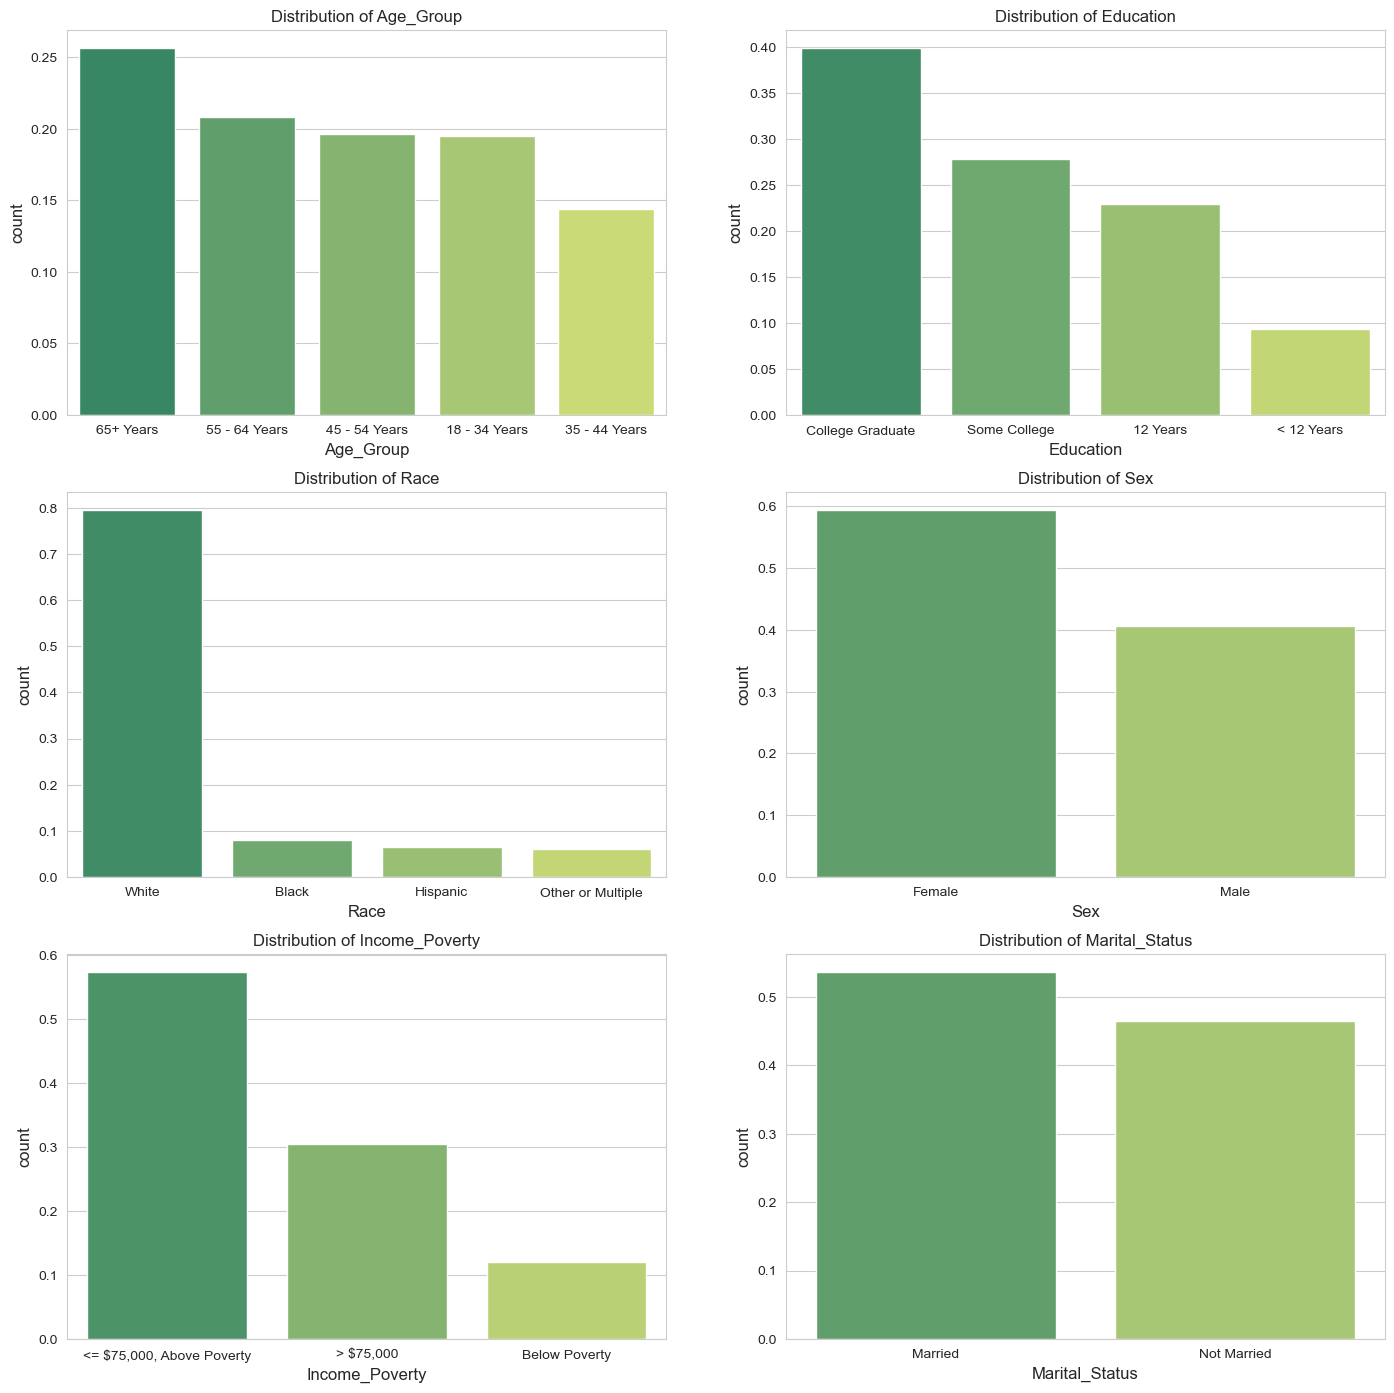

In [20]:
columns=['age_group','education', 'race', 'sex', 'income_poverty', 'marital_status']
        

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (17,17),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]

    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x,y=y,palette="summer",ax=ax) # plotting the barchart
    #palette="summer" parameter sets the color palette for the bars.

    ax.set_xlabel(f"{col.title()}",fontsize=12) # setting the respective labels
    ax.set_ylabel("count",fontsize=12)
    ax.set_title(f"Distribution of {col.title()}");

<h3 style="color:Indigo">Data Insights</h3>

* age group of 65+ year are more respondent.
* all people are literated some are graduated, college going and remening doing there schooling.
* People identifying as white( European, Middle Eastern, and North African people) dominate the dataset at around 80%.
* Almost 60% of the respondents are female.
* Close to 60% of the respondents earn  $75,000 above poverty.

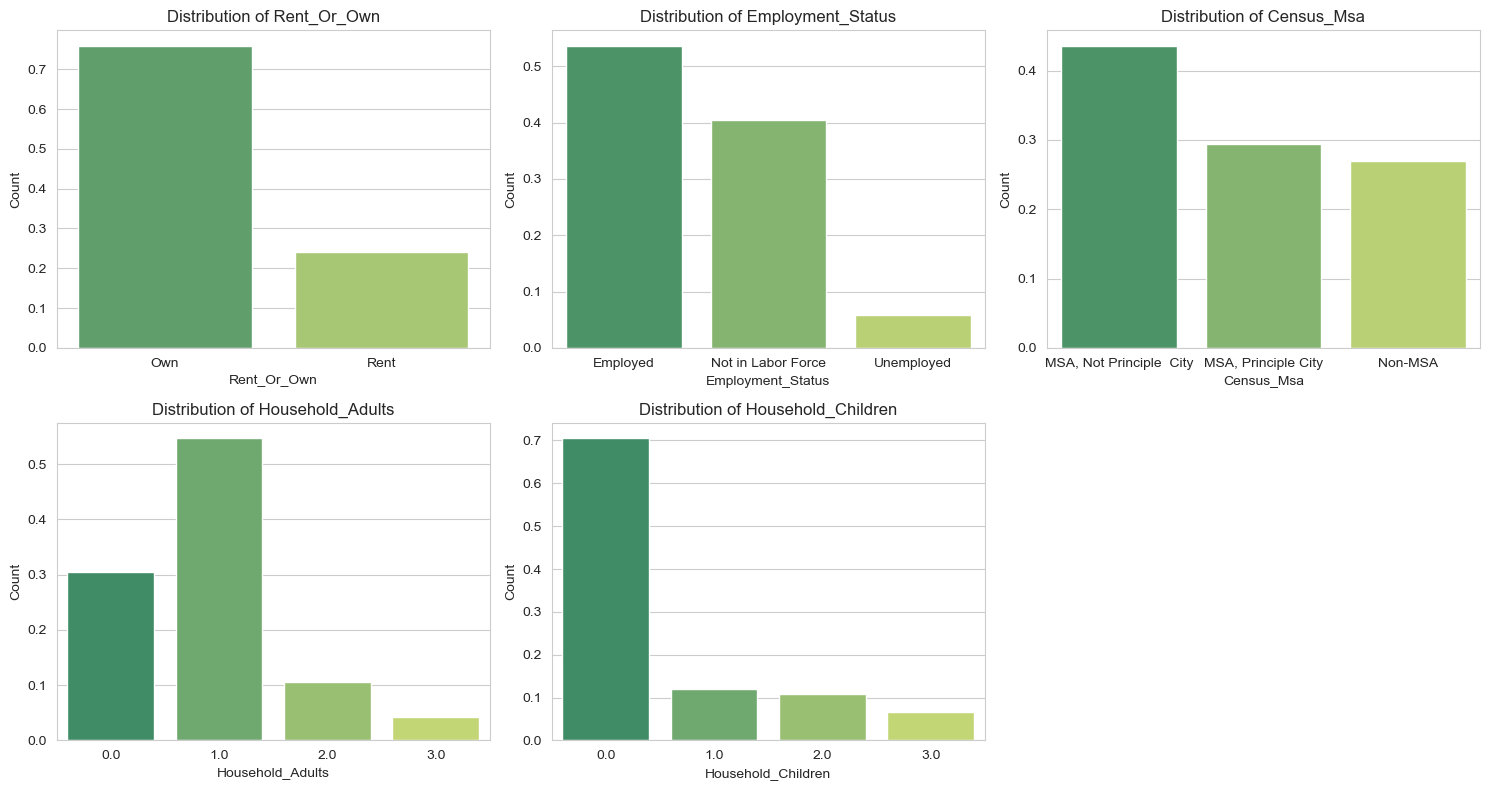

In [21]:
columns = ['rent_or_own', 'employment_status', 'census_msa', 'household_adults',
           'household_children']

fig, axes = plt.subplots(figsize=(15,8), nrows=2, ncols=3)
sns.set_style("whitegrid")

# Flatten the axes array to loop over the axes directly
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]

    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x, y=y, palette="summer", ax=ax)

    ax.set_xlabel(f"{col.title()}", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_title(f"Distribution of {col.title()}");

# Remove any extra subplots if the number of features is less than the available subplots
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<h3 style="color:Indigo">Data Insights</h3>

* 75% people have there own house
* 50% are employed ,5% are unemployed,and other are not in labor force.
* 40% lived in Metropolitan Statistical Area,30% lived in Metropolitan Statistical Area & principle city and rest of other   lived non Metropolitan Statistical Area.
* 



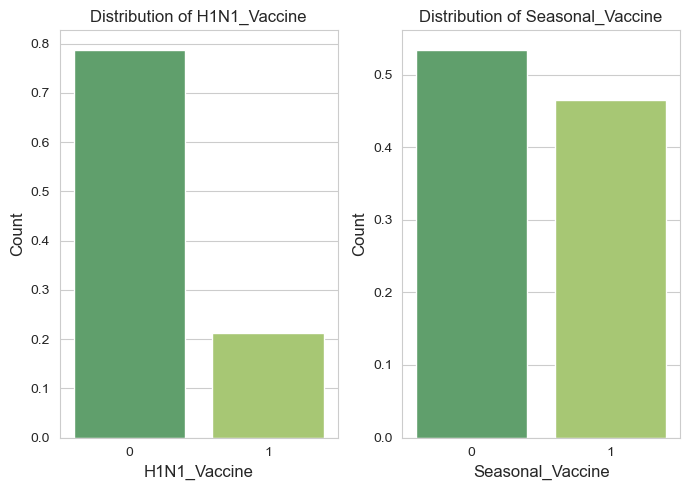

In [22]:
columns=['h1n1_vaccine', 'seasonal_vaccine']

# Setting style and figsize
sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(7, 5), nrows=1, ncols=2)

# Flattening the axes object
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]  # Accessing each subplot

    # Defining x and y for the bar chart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)

    sns.barplot(x=x, y=y, palette="summer", ax=ax)  # Plotting the bar chart

    ax.set_xlabel(f"{col.title()}", fontsize=12)  # Setting the respective labels
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"Distribution of {col.title()}")

plt.tight_layout()  # Adjusting the layout
plt.show()  # Displaying the plot



In [23]:
print(f"Count of people vaccinated against H1N1:\n{data.h1n1_vaccine.value_counts()}\n")
print(f"percentage of people vaccinated against H1N1:\n{data.h1n1_vaccine.value_counts(normalize=True)*100}\n")

print(f"Count of people vaccinated against seasonal flue :\n{data.seasonal_vaccine.value_counts()}\n")
print(f"percentage of people vaccinated against seasonal flue:\n{data.seasonal_vaccine.value_counts(normalize=True)*100}")


Count of people vaccinated against H1N1:
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

percentage of people vaccinated against H1N1:
0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64

Count of people vaccinated against seasonal flue :
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

percentage of people vaccinated against seasonal flue:
0    53.439173
1    46.560827
Name: seasonal_vaccine, dtype: float64


<h3 style="color:Indigo">Data Insights</h3>

* 21% people vaccinated against H1N1 & 46% people vaccinated against Seasonal flu.
* we can see that our target variable H1N1 is unbalanced


<h3 style="color:Indigo"> we will checked correlation of our features</h3>

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
h1n1_vaccine,1.000000,0.377143,0.121929,0.117951,0.040608,0.047690,0.070498,0.074712,0.017822,0.021768,0.071648,0.393890,0.209864,0.095207,0.066962,0.169768,0.121170,0.269347,0.323265,0.075091,0.179272,0.258571,0.008360,0.007545,-0.003320
seasonal_vaccine,0.377143,1.000000,0.154828,0.120152,0.006277,0.076395,0.050083,0.112414,0.064025,0.053509,0.120228,0.198607,0.369190,0.170174,0.012097,0.127311,0.200858,0.205072,0.216625,0.027404,0.361875,0.390106,-0.061510,-0.064840,-0.114614
h1n1_concern,0.121929,0.154828,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525
h1n1_knowledge,0.117951,0.120152,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583
behavioral_antiviral_meds,0.040608,0.006277,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822
behavioral_avoidance,0.047690,0.076395,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328
behavioral_face_mask,0.070498,0.050083,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826
behavioral_wash_hands,0.074712,0.112414,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764
behavioral_large_gatherings,0.017822,0.064025,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449
behavioral_outside_home,0.021768,0.053509,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558


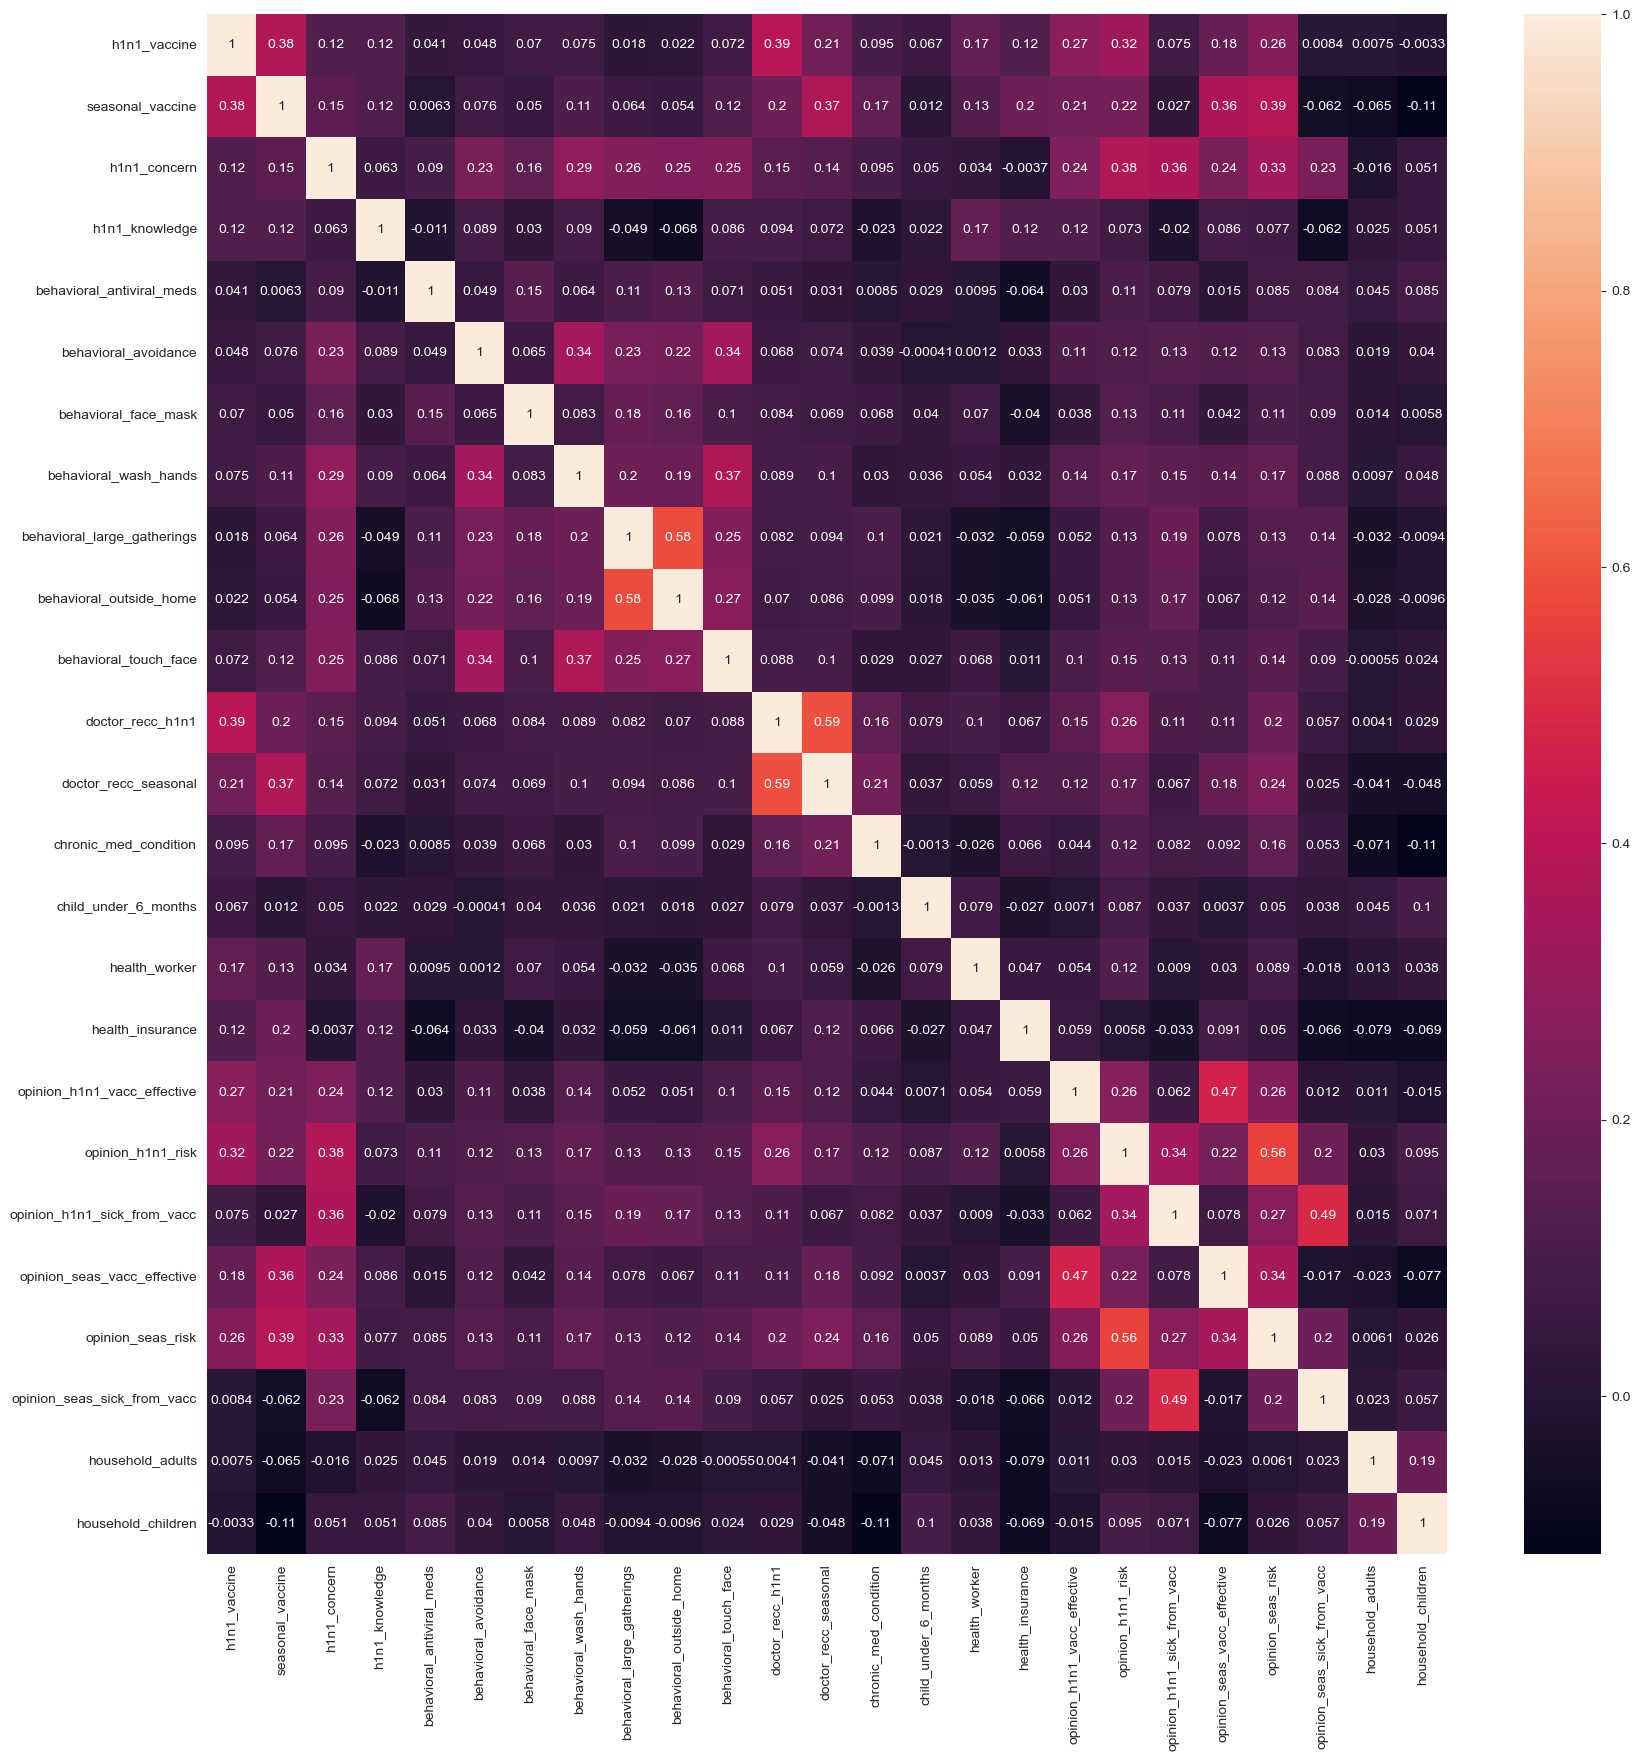

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()


<h1 style="color:Indigo"> Data Preprocessing</h1>

This section aims to prepare the data for modelling. It addresses missing data, wrong data types, invalid datatypes, scaling, encoding any categorical variables,dropping highly correlated columns and any feature engineering needed. The data is first split into training and test data to prevent data leakage. The target variables are meant to be `h1n1_vaccine` and `seasonal_vaccine`. 

In [26]:
data.isnull().sum()*100/len(data)

h1n1_vaccine                    0.000000
seasonal_vaccine                0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education       

In [27]:
#drooping column having more than 5% missing values.
data.drop(["doctor_recc_h1n1","doctor_recc_seasonal","health_insurance","education","income_poverty","marital_status","rent_or_own","employment_status"],axis=1,inplace=True)

<h2 style="color:Indigo"> Handling missing values</h2>

In [28]:
data.isnull().sum()

h1n1_vaccine                     0
seasonal_vaccine                 0
h1n1_concern                    92
h1n1_knowledge                 116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
opinion_h1n1_sick_from_vacc    395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
race                             0
sex                              0
census_msa                       0
household_adults               249
household_children             249
dtype: int64

In [29]:
data.isnull().sum()*100/len(data)

h1n1_vaccine                   0.000000
seasonal_vaccine               0.000000
h1n1_concern                   0.344479
h1n1_knowledge                 0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
age_group                      0.000000
race                           0.000000
sex                            0.000000
census_msa                     0.000000
household_adults               0.932340


In [30]:
data.h1n1_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [31]:
data.loc[data['h1n1_concern'].isnull(),'h1n1_concern']=2.0

In [32]:
data.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [33]:
data.loc[data['h1n1_knowledge'].isnull(),'h1n1_knowledge']=1.0

In [34]:
data.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [35]:
data.loc[data['behavioral_antiviral_meds'].isnull(),'behavioral_antiviral_meds']=0.0

In [36]:
data.behavioral_avoidance.value_counts()

1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

In [37]:
data.loc[data['behavioral_avoidance'].isnull(),'behavioral_avoidance']=1.0

In [38]:
data.behavioral_face_mask.value_counts()

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

In [39]:
data.loc[data['behavioral_face_mask'].isnull(),'behavioral_face_mask']=1.0

In [40]:
data.behavioral_wash_hands.value_counts()

1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

In [41]:
data.loc[data['behavioral_wash_hands'].isnull(),'behavioral_wash_hands']=1.0

In [42]:
data.behavioral_large_gatherings.value_counts()

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

In [43]:
data.loc[data['behavioral_large_gatherings'].isnull(),'behavioral_large_gatherings']=0.0

In [44]:
data.behavioral_outside_home.value_counts()

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

In [45]:
data.loc[data['behavioral_outside_home'].isnull(),'behavioral_outside_home']=0.0

In [46]:
data.behavioral_touch_face.value_counts()

1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

In [47]:
data.loc[data['behavioral_touch_face'].isnull(),'behavioral_touch_face']=1.0

In [48]:
data.chronic_med_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

In [49]:
data.loc[data['chronic_med_condition'].isnull(),'chronic_med_condition']=0.0

In [50]:
data.child_under_6_months.value_counts()

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

In [51]:
data.loc[data['child_under_6_months'].isnull(),'child_under_6_months']=0.0

In [52]:
data.health_worker.value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

In [53]:
data.loc[data['health_worker'].isnull(),'health_worker']=0.0

In [54]:
data.opinion_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

In [55]:
data.loc[data['opinion_h1n1_vacc_effective'].isnull(),'opinion_h1n1_vacc_effective']=4.0

In [56]:
data.opinion_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

In [57]:
data.loc[data['opinion_h1n1_risk'].isnull(),'opinion_h1n1_risk']=2.0

In [58]:
data.opinion_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

In [59]:
data.loc[data['opinion_seas_vacc_effective'].isnull(),'opinion_seas_vacc_effective']=4.0

In [60]:
data.opinion_seas_risk.value_counts()


2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64

In [61]:
data.loc[data['opinion_seas_risk'].isnull(),'opinion_seas_risk']=2.0

In [62]:
data.opinion_h1n1_sick_from_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

In [63]:
data.loc[data['opinion_h1n1_sick_from_vacc'].isnull(),'opinion_h1n1_sick_from_vacc']=2.0

In [64]:
data.opinion_seas_sick_from_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

In [65]:
data.loc[data['opinion_seas_sick_from_vacc'].isnull(),'opinion_seas_sick_from_vacc']=1.0

In [66]:
data.opinion_h1n1_sick_from_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

In [67]:
data.loc[data['opinion_h1n1_sick_from_vacc'].isnull(),'opinion_h1n1_sick_from_vacc']=2.0

In [68]:
data.household_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

In [69]:
data.loc[data['household_adults'].isnull(),'household_adults']=1.0

In [70]:
data.household_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

In [71]:
data.loc[data['household_children'].isnull(),'household_children']=0.0

In [72]:
data.isnull().sum()

h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
race                           0
sex                            0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

<h2 style="color:Indigo">  Now There are no null values </h2>

In [73]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,White,Female,Non-MSA,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,White,Male,"MSA, Not Principle City",0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,White,Male,"MSA, Not Principle City",2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,White,Female,"MSA, Principle City",0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,White,Female,"MSA, Not Principle City",1.0,0.0


In [74]:
#using label encoder convert categoarical value to numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data.age_group=LE.fit_transform(data.age_group)
data.race=LE.fit_transform(data.race)
data.sex=LE.fit_transform(data.sex)
data.census_msa=LE.fit_transform(data.census_msa)

In [75]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,3,3,0,2,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,3,1,0,0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,0,3,1,0,2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,4,3,0,1,0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,2,3,0,0,1.0,0.0


<h2 style="color:Indigo"> feature selection</h2>

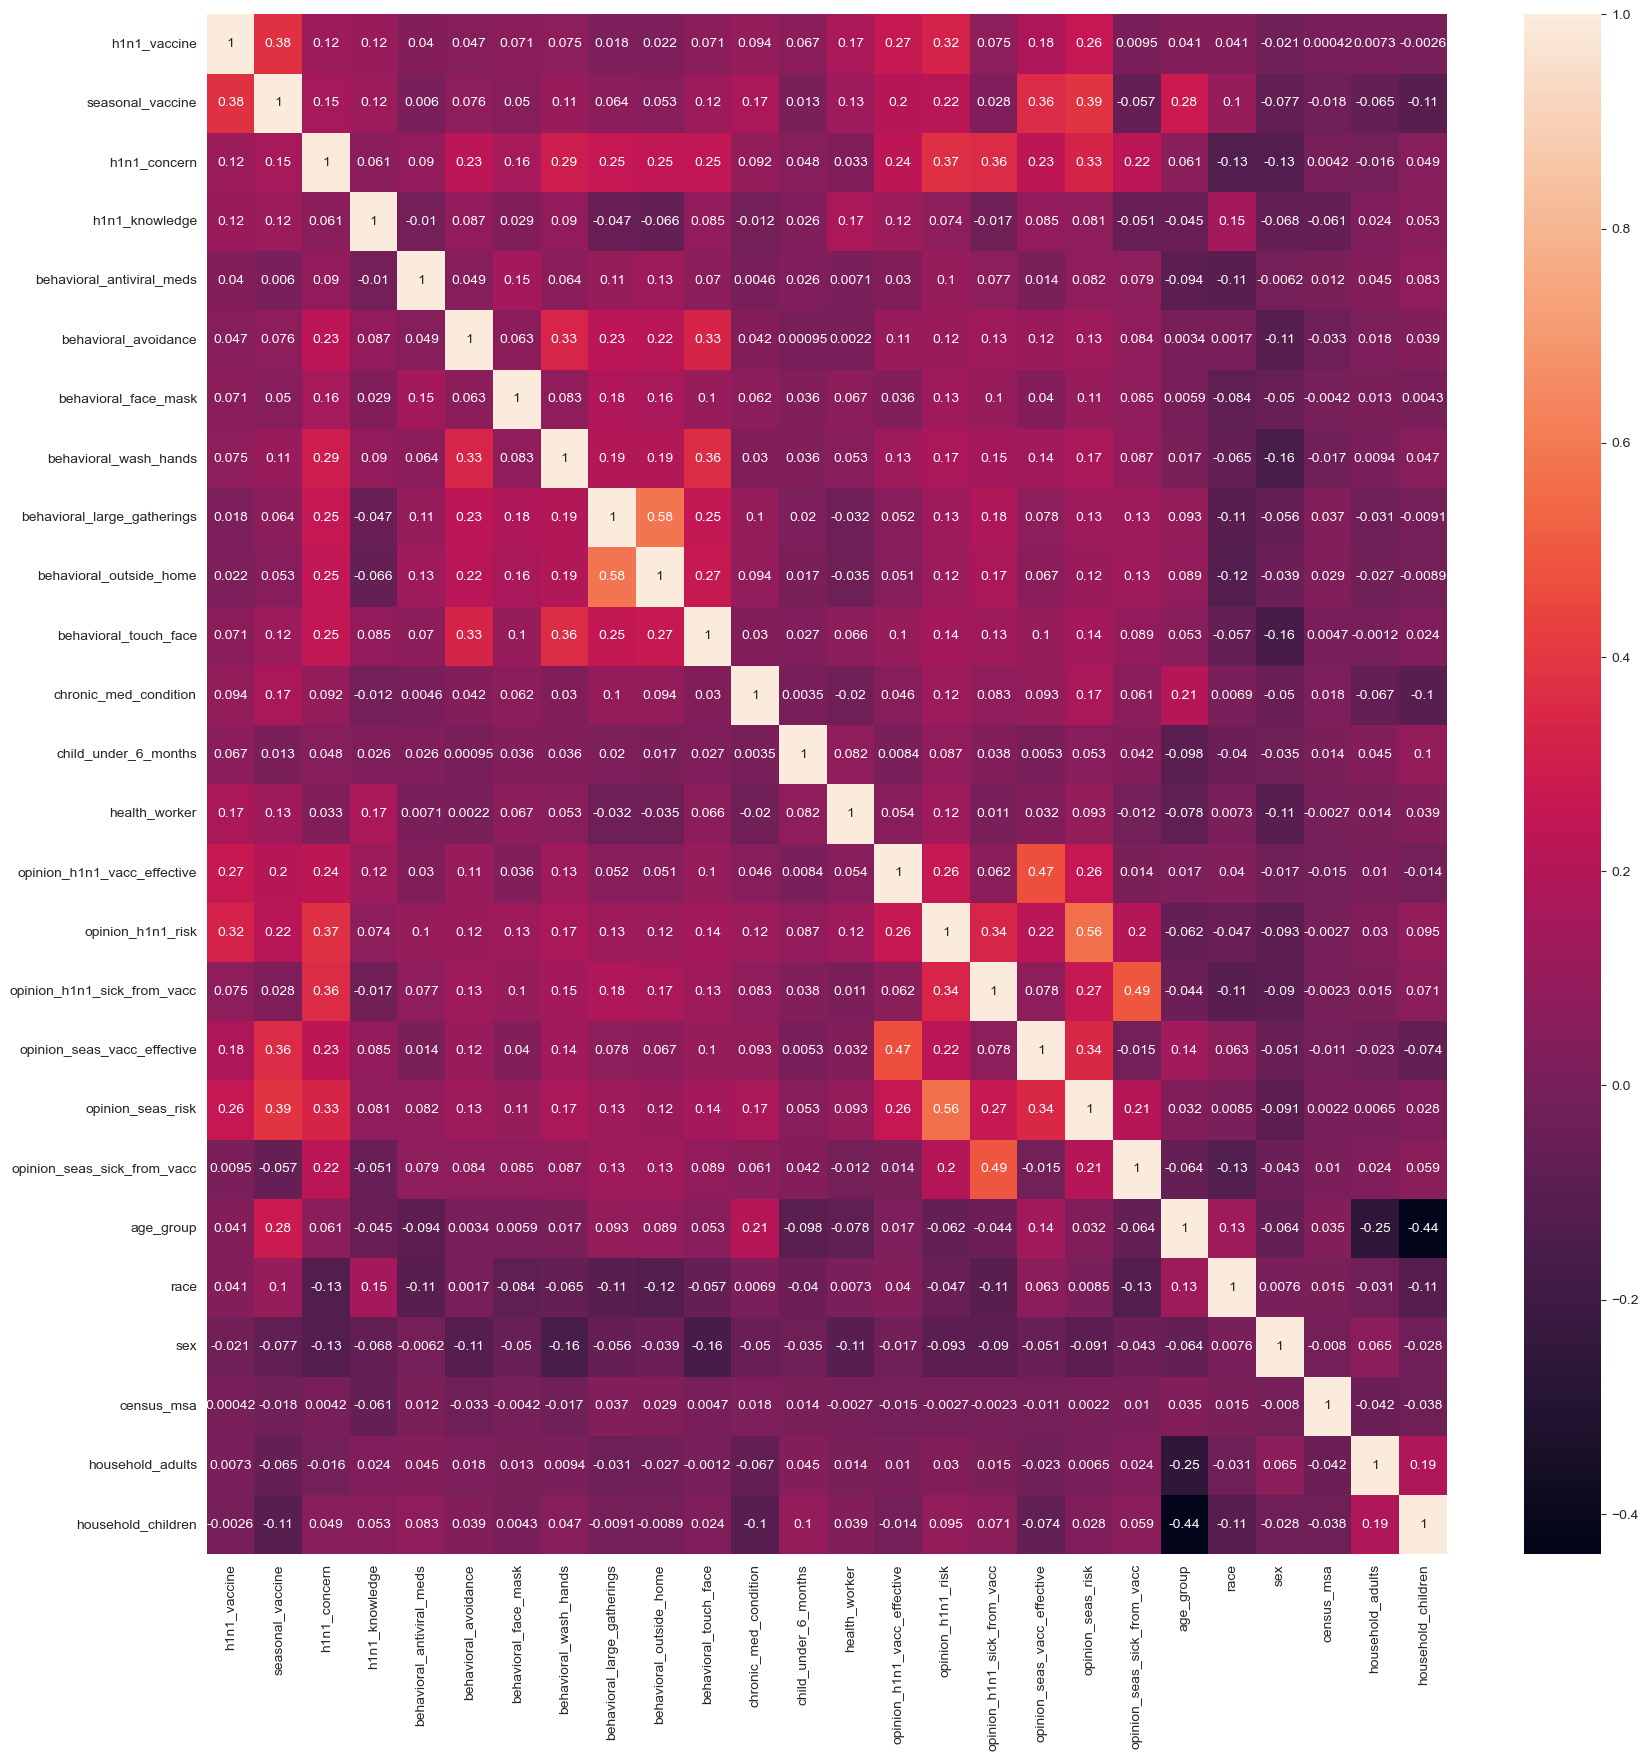

In [76]:
#heatmap correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [77]:
data.corr()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,census_msa,household_adults,household_children
h1n1_vaccine,1.000000,0.377143,0.121574,0.117771,0.040226,0.046837,0.070785,0.074570,0.018089,0.022080,0.070855,0.094360,0.066712,0.168056,0.267352,0.320580,0.074580,0.177799,0.255874,0.009465,0.041074,0.041061,-0.020672,0.000420,0.007323,-0.002567
seasonal_vaccine,0.377143,1.000000,0.154488,0.119779,0.006013,0.076130,0.050418,0.112254,0.063722,0.053287,0.119925,0.169465,0.013424,0.126977,0.203187,0.215650,0.027964,0.358869,0.386916,-0.057066,0.277454,0.101743,-0.077091,-0.018275,-0.065137,-0.111680
h1n1_concern,0.121574,0.154488,1.000000,0.060828,0.089866,0.229648,0.155379,0.291670,0.254133,0.245404,0.245038,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.220568,0.060573,-0.130248,-0.127503,0.004215,-0.016079,0.049441
h1n1_knowledge,0.117771,0.119779,0.060828,1.000000,-0.010450,0.087194,0.028562,0.089690,-0.047293,-0.066479,0.084633,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.050857,-0.045029,0.150439,-0.067567,-0.060630,0.023866,0.053378
behavioral_antiviral_meds,0.040226,0.006013,0.089866,-0.010450,1.000000,0.048533,0.145132,0.063996,0.106314,0.127204,0.069982,0.004637,0.026183,0.007145,0.030172,0.102553,0.076930,0.014498,0.081503,0.078618,-0.094191,-0.110963,-0.006196,0.012176,0.044829,0.083090
behavioral_avoidance,0.046837,0.076130,0.229648,0.087194,0.048533,1.000000,0.062917,0.334974,0.225402,0.217599,0.329796,0.042054,0.000952,0.002232,0.109066,0.116259,0.129983,0.117356,0.127991,0.084346,0.003369,0.001699,-0.112591,-0.032665,0.017995,0.038977
behavioral_face_mask,0.070785,0.050418,0.155379,0.028562,0.145132,0.062917,1.000000,0.082566,0.181427,0.163004,0.102514,0.062173,0.036371,0.067196,0.036146,0.128582,0.104953,0.039810,0.106121,0.084592,0.005935,-0.083771,-0.050490,-0.004161,0.013366,0.004284
behavioral_wash_hands,0.074570,0.112254,0.291670,0.089690,0.063996,0.334974,0.082566,1.000000,0.194750,0.191804,0.362979,0.030205,0.035749,0.052930,0.134815,0.167414,0.148739,0.136936,0.170655,0.087218,0.017109,-0.065468,-0.157033,-0.016584,0.009367,0.047451
behavioral_large_gatherings,0.018089,0.063722,0.254133,-0.047293,0.106314,0.225402,0.181427,0.194750,1.000000,0.580881,0.251383,0.099621,0.020074,-0.032226,0.052432,0.125076,0.183517,0.078208,0.130800,0.131414,0.093339,-0.108378,-0.055871,0.037169,-0.030994,-0.009126
behavioral_outside_home,0.022080,0.053287,0.245404,-0.066479,0.127204,0.217599,0.163004,0.191804,0.580881,1.000000,0.265401,0.093675,0.016657,-0.035128,0.050866,0.123348,0.171669,0.066861,0.117428,0.133080,0.089049,-0.124640,-0.039100,0.028633,-0.026542,-0.008937


<h3 style="color:Indigo">Data Insights</h3>

* behaviral_large_garthering and behaviral_outside_home are having correlation.`
* we are not drooping any column beacause we don't have correlation more than 80%.

<h1 style="color:Indigo"> Model Creation</h1>

In [78]:
from imblearn.over_sampling import SMOTE

# Separate features and target variables
X_h1n1 = data.drop(["seasonal_vaccine", "h1n1_vaccine", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"], axis=1)
y_h1n1 = data["h1n1_vaccine"]

# Balance the h1n1_vaccine target variable
smote_h1n1 = SMOTE(random_state=42)
X, y = smote_h1n1.fit_resample(X_h1n1, y_h1n1)

# Verify the balance of the target variable
print(y.value_counts())


0    21033
1    21033
Name: h1n1_vaccine, dtype: int64


In [80]:
#splitting data to train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2)

<h1 style="color:Indigo"> Model Selection</h1>



<h1 style="color:Indigo"> Random Forest</h1>

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf= rf_model.predict(X_test)

acc_rf=round(rf_model.score(X_test,Y_test)*100,2)

In [82]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4163
           1       0.91      0.86      0.88      4251

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



<h1 style="color:Indigo"> Logistic Regression</h1>

In [83]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred_reg=log_reg.predict(X_test)
acc_log=round(log_reg.score(X_test,Y_test)*100,2)

In [84]:
print(classification_report(Y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      4163
           1       0.72      0.70      0.71      4251

    accuracy                           0.71      8414
   macro avg       0.71      0.71      0.71      8414
weighted avg       0.71      0.71      0.71      8414



<h1 style="color:Indigo"> K Nearest Neighbor</h1>

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
acc_knn=round(knn.score(X_test,Y_test)*100,2)

In [86]:
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4163
           1       0.82      0.88      0.85      4251

    accuracy                           0.84      8414
   macro avg       0.84      0.84      0.84      8414
weighted avg       0.84      0.84      0.84      8414



<h1 style="color:Indigo"> Gaussian Naive Bayes</h1>

In [87]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
y_pred_gua=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_test,Y_test)*100,2)

In [88]:
print(classification_report(Y_test,y_pred_gua))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68      4163
           1       0.68      0.71      0.70      4251

    accuracy                           0.69      8414
   macro avg       0.69      0.69      0.69      8414
weighted avg       0.69      0.69      0.69      8414



<h1 style="color:Indigo"> Decision Tree</h1>

In [89]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred_dt=dt_model.predict(X_test)
acc_dt=round(dt_model.score(X_test,Y_test)*100,2)

In [90]:
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4163
           1       0.81      0.84      0.82      4251

    accuracy                           0.82      8414
   macro avg       0.82      0.82      0.82      8414
weighted avg       0.82      0.82      0.82      8414



<h1 style="color:Indigo"> Support Vector Machine</h1>

In [91]:
from sklearn.svm import SVC
SV_model=SVC()
SV_model.fit(X_train,Y_train)
y_pred_SV=SV_model.predict(X_test)
acc_SV_model=round(SV_model.score(X_test,Y_test)*100,2)

In [92]:
print(classification_report(Y_test,y_pred_SV))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      4163
           1       0.75      0.70      0.72      4251

    accuracy                           0.73      8414
   macro avg       0.73      0.73      0.73      8414
weighted avg       0.73      0.73      0.73      8414



<h1 style="color:Indigo"> Gradient Boosting Classifier</h1>

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
y_pred_GBC=GBC.predict(X_test)
acc_GBC=round(GBC.score(X_test,Y_test)*100,2)

In [94]:
print(classification_report(Y_test,y_pred_GBC))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4163
           1       0.88      0.83      0.86      4251

    accuracy                           0.86      8414
   macro avg       0.86      0.86      0.86      8414
weighted avg       0.86      0.86      0.86      8414



<h1 style="color:Indigo"> XG BOOST</h1>

In [95]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
y_pred_XGB=XGB.predict(X_test)
acc_XGB=round(XGB.score(X_test,Y_test)*100,2)

In [96]:
print(classification_report(Y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4163
           1       0.92      0.83      0.87      4251

    accuracy                           0.88      8414
   macro avg       0.88      0.88      0.88      8414
weighted avg       0.88      0.88      0.88      8414



<h1 style="color:Indigo">All Scores Of Models</h1>

In [97]:
score=pd.DataFrame({
    "model":["Random Forest"," Logistic Regresion","K Nearest Neighbor","Gaussian Naive Bayes",
             "Decision Tree","Support Vector Machine ","Gradient Boosting","XG Boost"],
    "Accuracy":[acc_rf,acc_log,acc_knn,acc_gaussian,acc_dt,acc_SV_model,acc_GBC,acc_XGB]

})

score_df=score.sort_values(by="Accuracy",ascending=False)
score_df=score_df.set_index("Accuracy")

score_df.head(9)                     

,model
Accuracy,
88.51,Random Forest
87.85,XG Boost
85.92,Gradient Boosting
84.15,K Nearest Neighbor
81.90,Decision Tree
72.91,Support Vector Machine
71.14,Logistic Regresion
68.60,Gaussian Naive Bayes


* after applying all the above models,we can see that Random forest give  more accuracy so we implement that model

<h1 style="color:Indigo"> Implementing  Random Forest model</h1>

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf=round(rf_model.score(X_test,Y_test)*100,2)

In [99]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4163
           1       0.91      0.86      0.88      4251

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



In [100]:
pd.crosstab(Y_test,y_pred_rf)

col_0,0,1
h1n1_vaccine,,
0,3802,361
1,606,3645


<h1 style="color:Indigo">Hyperparameter Tunning Random Forest model</h1>


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50,60,70],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search using cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best parameters to create a new Random Forest classifier
best_rf_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Train the model using the entire training set
best_rf_model.fit(X_train, Y_train)

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(Y_test, y_pred))


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 70}
Best Score: 0.8812552420406081
Accuracy: 0.8879248870929404
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4163
           1       0.91      0.86      0.89      4251

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



* after doing hyperparmeter tuuning we also get same accuracy so, here we consider accuracy of best parameter which are 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 70 

<h1 style="color:Indigo">Model Evaluation</h1>

In [103]:
rf=RandomForestClassifier(n_estimators=60,max_depth= None ,min_samples_split=5, min_samples_leaf= 1, max_features= 'auto')#passing best parameter to randomforest
rf.fit(X_train, Y_train)#training 
y_pred=rf.predict(X_test)#testing


In [105]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4163
           1       0.91      0.85      0.88      4251

    accuracy                           0.89      8414
   macro avg       0.89      0.89      0.89      8414
weighted avg       0.89      0.89      0.89      8414



<h1 style="color:Indigo">Plotting ROC & AUC Curve</h1>


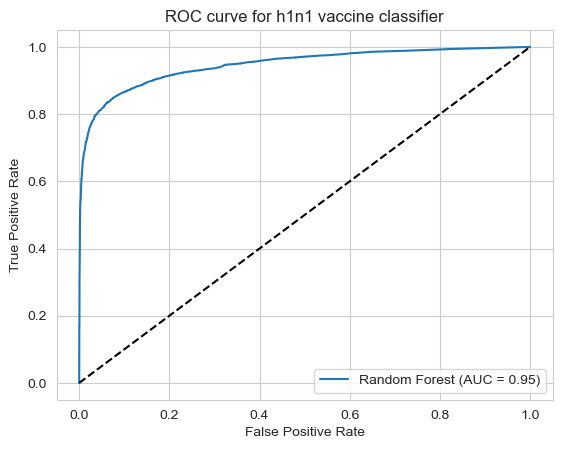

AUC Score: 0.94643811607143


In [110]:

from sklearn.metrics import roc_curve, roc_auc_score

rf_model.fit(X_train,Y_train)
# Obtain predicted probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for h1n1 vaccine classifier')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print('AUC Score:', auc_score)


In [111]:
print(roc_auc_score(Y_test,y_probs))

0.94643811607143


<h1 style="color:Indigo">Model Selection</h1>

<h1 style="color:Indigo">Seasonal vaaccine</h1>

In [112]:
X_seasonal = data.drop(["seasonal_vaccine", "h1n1_vaccine", "h1n1_concern", "h1n1_knowledge", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc"], axis=1)
y_seasonal = data["seasonal_vaccine"]

# Balance the seasonal_vaccine target variable
smote_seasonal = SMOTE(random_state=42)
X1, y1 = smote_seasonal.fit_resample(X_seasonal, y_seasonal)

print(y1.value_counts())


0    14272
1    14272
Name: seasonal_vaccine, dtype: int64


In [113]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test= train_test_split(X1,y1,test_size=0.2)

In [114]:
X1_train.shape

(22835, 19)

In [115]:
X1_test.shape

(5709, 19)

In [116]:
Y1_train.shape

(22835,)

In [117]:
Y1_test.shape

(5709,)

<h1 style="color:Indigo"> Random Forest</h1>

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score

rf_model_sea= RandomForestClassifier(random_state=42)
rf_model_sea.fit(X1_train, Y1_train)
y1_pred_rf = rf_model_sea.predict(X1_test)

acc_rf_sea=round(rf_model_sea.score(X1_test,Y1_test)*100,2)

In [120]:
print(classification_report(Y1_test,y1_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2857
           1       0.75      0.75      0.75      2852

    accuracy                           0.75      5709
   macro avg       0.75      0.75      0.75      5709
weighted avg       0.75      0.75      0.75      5709



<h1 style="color:Indigo"> Logistic Regression</h1>

In [121]:
from sklearn.linear_model import LogisticRegression

log_reg_sea=LogisticRegression()
log_reg_sea.fit(X1_train,Y1_train)
y1_pred_reg=log_reg_sea.predict(X1_test)
acc_log_sea=round(log_reg_sea.score(X1_test,Y1_test)*100,2)

In [122]:
print(classification_report(Y1_test,y1_pred_reg))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2857
           1       0.74      0.74      0.74      2852

    accuracy                           0.74      5709
   macro avg       0.74      0.74      0.74      5709
weighted avg       0.74      0.74      0.74      5709



<h1 style="color:Indigo"> K Nearest Neighbor</h1>

In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn_sea=KNeighborsClassifier(n_neighbors=2)
knn_sea.fit(X1_train,Y1_train)
y1_pred_knn=knn_sea.predict(X1_test)
acc_knn_sea=round(knn_sea.score(X1_test,Y1_test)*100,2)

In [124]:
print(classification_report(Y1_test,y1_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72      2857
           1       0.76      0.53      0.62      2852

    accuracy                           0.68      5709
   macro avg       0.70      0.68      0.67      5709
weighted avg       0.70      0.68      0.67      5709



<h1 style="color:Indigo"> Gaussian Naive Bayes</h1>

In [125]:
from sklearn.naive_bayes import GaussianNB
gaussian_sea=GaussianNB()
gaussian_sea.fit(X1_train,Y1_train)
y1_pred_gua=gaussian_sea.predict(X1_test)
acc_gaussian_sea=round(gaussian_sea.score(X1_test,Y1_test)*100,2)

In [126]:
print(classification_report(Y1_test,y1_pred_gua))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      2857
           1       0.69      0.72      0.71      2852

    accuracy                           0.70      5709
   macro avg       0.70      0.70      0.70      5709
weighted avg       0.70      0.70      0.70      5709



<h1 style="color:Indigo">Decision Tree</h1>

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt_model_sea=DecisionTreeClassifier()
dt_model_sea.fit(X1_train,Y1_train)
y1_pred_dt=dt_model_sea.predict(X1_test)
acc_dt_sea=round(dt_model_sea.score(X1_test,Y1_test)*100,2)

In [128]:
print(classification_report(Y1_test,y1_pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2857
           1       0.66      0.66      0.66      2852

    accuracy                           0.66      5709
   macro avg       0.66      0.66      0.66      5709
weighted avg       0.66      0.66      0.66      5709



<h1 style="color:Indigo"> Support Vector Machine</h1>

In [129]:
from sklearn.svm import SVC
SV_model_sea=SVC()
SV_model_sea.fit(X1_train,Y1_train)
y1_pred_SV=SV_model_sea.predict(X1_test)
acc_SV_model_sea=round(SV_model_sea.score(X1_test,Y1_test)*100,2)

In [130]:
print(classification_report(Y1_test,y1_pred_SV))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2857
           1       0.75      0.75      0.75      2852

    accuracy                           0.75      5709
   macro avg       0.75      0.75      0.75      5709
weighted avg       0.75      0.75      0.75      5709



<h1 style="color:Indigo"> Gradient Boosting</h1>

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_sea=GradientBoostingClassifier()
GBC_sea.fit(X1_train,Y1_train)
y1_pred_GBC=GBC_sea.predict(X1_test)
acc_GBC_sea=round(GBC_sea.score(X1_test,Y1_test)*100,2)

In [132]:
print(classification_report(Y1_test,y1_pred_GBC))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2857
           1       0.76      0.77      0.77      2852

    accuracy                           0.77      5709
   macro avg       0.77      0.77      0.77      5709
weighted avg       0.77      0.77      0.77      5709



<h1 style="color:Indigo">XGBoost</h1>

In [133]:
from xgboost import XGBClassifier
XGB_sea=XGBClassifier()
XGB_sea.fit(X1_train,Y1_train)
y1_pred_XGB=XGB_sea.predict(X1_test)
acc_XGB_sea=round(XGB_sea.score(X1_test,Y1_test)*100,2)

In [134]:
print(classification_report(Y1_test,y1_pred_XGB))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2857
           1       0.77      0.76      0.77      2852

    accuracy                           0.77      5709
   macro avg       0.77      0.77      0.77      5709
weighted avg       0.77      0.77      0.77      5709



<h1 style="color:Indigo">All Scores Of Models</h1>

In [135]:
score=pd.DataFrame({
    "model":["Random Forest"," Logistic Regresion","K Nearest Neighbor","Gaussian Naive Bayes",
             "Decision Tree","Support Vector Machine ","Gradient Boosting","XG Boost"],
    "Accuracy":[acc_rf_sea,acc_log_sea,acc_knn_sea,acc_gaussian_sea,acc_dt_sea,acc_SV_model_sea,
                acc_GBC_sea,acc_XGB_sea]

})

score_df1=score.sort_values(by="Accuracy",ascending=False)
score_df1=score_df1.set_index("Accuracy")

score_df1.head(9)    

,model
Accuracy,
76.70,Gradient Boosting
76.63,XG Boost
75.04,Support Vector Machine
74.83,Random Forest
74.13,Logistic Regresion
69.82,Gaussian Naive Bayes
68.07,K Nearest Neighbor
66.44,Decision Tree


* Gradient boosting give more accuracy so implement this model

<h1 style="color:Indigo">Implementing Gradient Boosting Model</h1>

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_sea=GradientBoostingClassifier()
GBC_sea.fit(X1_train,Y1_train)
y1_pred_GBC=GBC_sea.predict(X1_test)
acc_GBC_sea=round(GBC_sea.score(X1_test,Y1_test)*100,2)

In [137]:
print(classification_report(Y1_test,y1_pred_GBC))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2857
           1       0.76      0.77      0.77      2852

    accuracy                           0.77      5709
   macro avg       0.77      0.77      0.77      5709
weighted avg       0.77      0.77      0.77      5709



<h1 style="color:Indigo">Hyperparameter Tunning Gradient Boosting model</h1>

In [138]:
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gb_model_sea = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(gb_model_sea, param_grid, cv=5)
grid_search.fit(X1_train, Y1_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the model with the best hyperparameters
best_model.fit(X1_train, Y1_train)

# Evaluate the model on the test set
y1_pred = best_model.predict(X1_test)
accuracy = accuracy_score(Y1_test, y1_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.7684358031178841


In [147]:
print(classification_report(Y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2857
           1       0.77      0.77      0.77      2852

    accuracy                           0.77      5709
   macro avg       0.77      0.77      0.77      5709
weighted avg       0.77      0.77      0.77      5709



<h1 style="color:Indigo">Model Evaluation</h1>

In [148]:
gb_model_sea = GradientBoostingClassifier(learning_rate= 0.1 ,max_depth= 3 , n_estimators = 200)#passing best parameter to randomforest
gb_model_sea.fit(X1_train, Y1_train)#training 
y1_pred=gb_model_sea.predict(X1_test)#testing

In [149]:
print(classification_report(Y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2857
           1       0.77      0.77      0.77      2852

    accuracy                           0.77      5709
   macro avg       0.77      0.77      0.77      5709
weighted avg       0.77      0.77      0.77      5709



<h1 style="color:Indigo">Plotting ROC & AUC</h1>


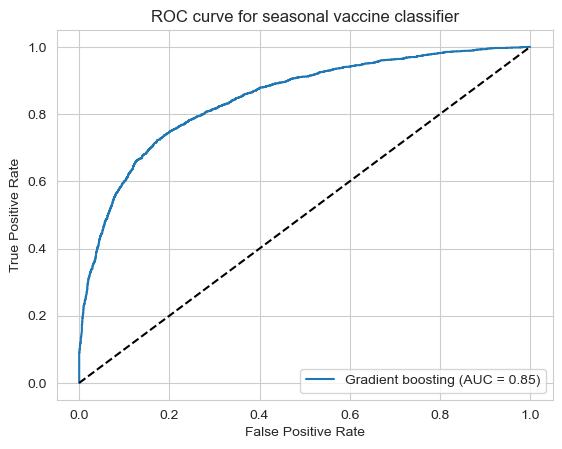

AUC Score: 0.8468856296952295


In [152]:
from sklearn.metrics import roc_curve, roc_auc_score

gb_model_sea.fit(X1_train,Y1_train)
# Obtain predicted probabilities for the positive class
y1_probs = gb_model_sea.predict_proba(X1_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y1_test, y1_probs)

# Calculate AUC score
auc_score = roc_auc_score(Y1_test, y1_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='Gradient boosting (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for seasonal vaccine classifier')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print('AUC Score:', auc_score)


In [143]:
print(roc_auc_score(Y1_test,y1_probs))

0.8468856296952295


<h1 style="color:Indigo">Conclusion</h1>

<h3 style="color:Indigo">H1N1 Vaccine</h3>

* The precision, recall, and F1-score for the H1N1 vaccine prediction are all around 89%, indicating a balanced performance for both the positive and negative classes. 
* The AUC score of 0.946 suggests a good level of discrimination between the classes, indicating the model's ability to distinguish between individuals who are likely to receive the seasonal vaccine and those who are not.





<h3 style="color:Indigo">Seasonal Vaccine</h3> 

* The precision, recall, and F1-score for the seasonal vaccine prediction are all around 77%, indicating a balanced performance for both the positive and negative classes. 
* The AUC score of 0.847 suggests a good level of discrimination between the classes, indicating the model's ability to distinguish between individuals who are likely to receive the seasonal vaccine and those who are not.

Overall, the H1N1 vaccine shows a relatively higher level of accuracy compared to the seasonal vaccine. This difference could be attributed to variations in the dataset or the distinct characteristics of each vaccine.